In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from pathlib import Path
import datetime

# MapBox token
token = "pk.eyJ1IjoiZnlubndpIiwiYSI6ImNrODk3YmF6MzAzcDczbWs5NXdhaGpyNzYifQ.vHweJb-1hjDeE21tTs7tGQ"

## Load data

In [2]:
DIR_base = Path.cwd().parent
DIR_data = Path.joinpath(DIR_base, "data")

In [3]:
data = pd.read_pickle(Path.joinpath(DIR_data, "processed", "temp_yearly_summary.pkl"))
stations = pd.read_pickle(Path.joinpath(DIR_data, "processed", "stations_hourly_temp_hist.pkl"))

In [4]:
stations

,station_id,start_date,end_date,altitude,latitude,longitude,name,state
0,3,1950-04-01,2011-03-31,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
1,44,2007-04-01,2020-03-28,44,52.9336,8.2370,Großenkneten,Niedersachsen
2,52,1976-01-01,1988-01-01,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
3,71,2009-12-01,2020-01-02,759,48.2156,8.9784,Albstadt-Badkap,Baden-Württemberg
4,73,2007-04-01,2020-03-28,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern
...,...,...,...,...,...,...,...,...
653,14138,2009-09-15,2015-12-31,73,52.1655,14.1224,Falkenberg (Grenzschichtmessfeld),Brandenburg
654,15000,2011-04-01,2020-03-28,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
655,15207,2013-11-01,2020-03-28,317,51.2835,9.3590,Schauenburg-Elgershausen,Hessen
656,15444,2014-09-01,2020-03-28,593,48.4418,9.9216,Ulm-Mähringen,Baden-Württemberg


## Reshape data

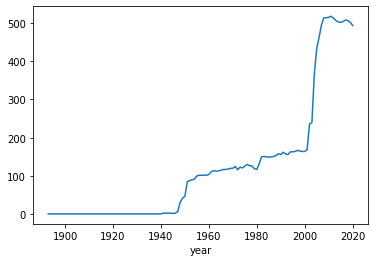

In [5]:
df = data.reset_index()
ids = df['station_id']
years = df['date'].dt.year.rename('year')
temp_max = df['temperature']['max'].rename('t_max')
temp_std = df['temperature']['std'].rename('t_std')

df = pd.concat([ids, years, temp_max, temp_std], axis=1)

df = pd.merge(df, stations, on='station_id').drop(['start_date', 'end_date'], axis=1)
#df[df['year'] == 1990]
df.groupby('year')['year'].count().plot()

## Create Plot

In [6]:
df_backup = df.copy()

In [7]:
import pandas as pd
import plotly.graph_objects as go

In [13]:
token = "pk.eyJ1IjoiZnlubndpIiwiYSI6ImNrODk3YmF6MzAzcDczbWs5NXdhaGpyNzYifQ.vHweJb-1hjDeE21tTs7tGQ"

df = df_backup.copy()
years = list(range(1950, 2021))
df = df[(df['year'] >= years[0]) & (df['year'] < years[-1])]

In [14]:
df.sort_values("year").head()

,station_id,year,t_max,t_std,altitude,latitude,longitude,name,state
0,3,1950,30.7,7.506889,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
5075,1975,1950,29.7,7.432834,14,53.6332,9.9881,Hamburg-Fuhlsbüttel,Hamburg
1600,598,1950,31.8,7.709489,62,50.7285,7.0839,Bonn,Nordrhein-Westfalen
4870,1833,1950,28.3,8.092097,1307,49.0851,13.2801,Grosser Falkenstein,Bayern
13690,5705,1950,33.6,8.637694,268,49.7704,9.9576,Würzburg,Bayern


In [16]:


# 1. Layout
layout = go.Layout(
    title="DWD Stations in Germany",
    width=1000,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        center=dict(
            lat=51.164,
            lon=10.454
        ),
        pitch=0,
        zoom=5,
        style='basic'
    ),
    updatemenus=[dict(
        buttons=[
            # Play button
            dict(
                args=[
                    None, 
                    dict(
                        frame=dict(duration=500, redraw=True),
                        fromcurrent=True,
                        transition=dict(duration=300, easing="quadratic-in-out")
                    )
                ],
                label="Play",
                method="animate"
            ),
            # Pause button
            dict(
                args=[
                    [None], 
                    dict(
                        frame=dict(duration=0, redraw=True),
                        mode="immediate",
                        transition=dict(duration=0)
                    )
                ],
                label="Pause",
                method="animate"
            )
        ],
        
        direction="left",
        pad=dict(r=10, t=87),
        showactive=False,
        type="buttons",
        x=0.1,
        xanchor="right",
        y=0,
        yanchor="top"
    )]
)


# 2. Sliders (steps still have to be filled)
sliders_dict = dict(
    active=0,
    yanchor="top",
    xanchor="left",
    currentvalue=dict(
        font=dict(size=20),
        prefix="Year ",
        visible=True,
        xanchor="right"
    ),
    transition=dict(duration=300, easing="cubic-in-out"),
    pad=dict(b=10, t=50),
    len=0.9,
    x=0.1,
    y=0,
    steps=[]
)


# 2. Data
data = [
    go.Scattermapbox( 
        lat=df[df['year'] == years[0]]['latitude'],
        lon=df[df['year'] == years[0]]['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=15,
            color=df[df['year'] == years[0]]['t_max'],
            colorscale='thermal',
            cmin=0,
            cmax=45,
        ),
        text=df[df['year'] == years[0]]['name'],
    )
]


# 3. Frames
frames = []
for year in years:
    # a frame has a name and some data content
    frame = dict(data=[], name=str(year))
    
    
    data_dict = go.Scattermapbox( 
        lat=df[df['year'] == year]['latitude'],
        lon=df[df['year'] == year]['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=15,
            color=df[df['year'] == year]['t_max'],
            colorscale='thermal',
            cmin=0,
            cmax=45,
        ),
        text=df[df['year'] == year]['name'],
    )
    
    # add data to the frame
    frame['data'].append(data_dict)
    # add frame to the list of frames
    frames.append(frame)
    print("Appended frame for year ", frame['name'])
    
    
    # make the slider step
    slider_step = dict(
        args=[
            [year],
            dict(
                frame=dict(duration=900, redraw=True),
                mode="immediate",
                transition=dict(duration=300)
            )
        ],
        label=year,
        method="animate"
    )
    sliders_dict['steps'].append(slider_step)

    
# add sliders to the layout
layout['sliders'] = [sliders_dict]


fig = go.Figure(layout=layout, data=data, frames=frames)
fig.write_html("map.html")
fig.show()

Appended frame for year  1950
Appended frame for year  1951
Appended frame for year  1952
Appended frame for year  1953
Appended frame for year  1954
Appended frame for year  1955
Appended frame for year  1956
Appended frame for year  1957
Appended frame for year  1958
Appended frame for year  1959
Appended frame for year  1960
Appended frame for year  1961
Appended frame for year  1962
Appended frame for year  1963
Appended frame for year  1964
Appended frame for year  1965
Appended frame for year  1966
Appended frame for year  1967
Appended frame for year  1968
Appended frame for year  1969
Appended frame for year  1970
Appended frame for year  1971
Appended frame for year  1972
Appended frame for year  1973
Appended frame for year  1974
Appended frame for year  1975
Appended frame for year  1976
Appended frame for year  1977
Appended frame for year  1978
Appended frame for year  1979
Appended frame for year  1980
Appended frame for year  1981
Appended frame for year  1982
Appended f